In [23]:
import sys
# import matplotlib
# import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from sklearn.cluster import Birch, DBSCAN
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.colors import LogNorm
# import matplotlib.cm as cm
# import seaborn as sns # improves plot aesthetics


np.random.seed(1231231)

# Corrosion Data
apcRoot = "./apcData/APCData/"
df3 = pd.read_csv(apcRoot + "APC_3_3_21/APC_3_3_21_HitDriven.TXT",  delim_whitespace=True)
df4 = pd.read_csv(apcRoot + "APC_3_4_21/APC_3_4_21_HitDriven.TXT",  delim_whitespace=True)
df8 = pd.read_csv(apcRoot + "APC_3_8_21/APC_3_8_21_HitDriven.TXT",  delim_whitespace=True)
df9 = pd.read_csv(apcRoot + "APC_3_9_21/APC_3_9_21_HitDriven.TXT",  delim_whitespace=True)
df10 = pd.read_csv(apcRoot + "APC_3_10_21/APC_3_10_21_HitDriven.TXT",  delim_whitespace=True)
dfcors = [df3, df4, df8, df9, df10]

#Abrasion Data
wtaRoot = "./wtaData/"
df15hz = pd.read_csv(wtaRoot + "WTA_3_18_21_15Hz_10min_HitDriven.TXT", delim_whitespace=True)
df20hz = pd.read_csv(wtaRoot + "WTA_3_18_21_20Hz_10min_HitDriven.TXT", delim_whitespace=True)
df25hz = pd.read_csv(wtaRoot + "WTA_3_18_21_25Hz_10min_HitDriven.TXT", delim_whitespace=True)


dfcor = df3.copy()

for df in dfcors[1:]:
    dfcor = dfcor.append(df)

print(len(dfcor.index))
print(len(df25hz.index))
dfs_tun = [df15hz, df20hz, df25hz]
df25Filt = df25hz[df25hz['AMP'] >= 40]

2005
87469


In [29]:
df25Filt

,ID,SSSSSSSS.mmmuuun,CH,RISE,COUN,ENER,DURATION,AMP,A-FRQ,RMS,ASL,PCNTS,THR,R-FRQ,I-FRQ,SIG-STRNGTH,ABS-ENERGY,FRQ-C,P-FRQ
0,1,64.318983,3,3,3,0,4,40,750,0.0024,30,2,35,1000,666,189.1,1.202,511,434
1,1,64.319804,1,404,11,0,424,46,26,0.0008,22,2,35,473,4,4441.0,25.372,560,468
3,1,64.328378,1,331,17,0,353,44,48,0.0008,22,8,35,428,24,4508.0,24.729,565,468
7,1,64.348139,1,0,9,0,26,41,346,0.0008,22,8,35,40,8000,1025.0,6.115,590,463
9,1,64.367638,1,4,13,0,31,55,419,0.0008,22,3,35,384,750,4633.0,137.101,536,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87462,1,600.629186,1,361,11,0,566,43,19,0.0004,15,2,35,44,5,5438.0,16.871,528,156
87463,1,600.629384,3,454,263,23,7215,46,36,0.0008,22,60,35,30,132,147406.0,694.654,383,141
87465,1,600.642584,3,1490,20,4,2260,42,9,0.0012,24,12,35,10,8,28203.0,72.071,495,449
87466,1,600.647041,3,1902,138,29,14373,43,10,0.0012,25,18,35,9,9,184266.0,483.955,490,449


In [9]:
#AMP A-FRQ ASL R-FRQ ABS-ENERGY FRQ-C P-FRQ DURATION
# plt.rcParams['figure.figsize'] = [12/2, 8/2]
# plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

def perform_analysis(data, d_name):
    #Calculate Sample Standard Deviation
    N = len(data)
    x_bar = np.average(data)
    S = np.std(data, ddof=1) #Sets divisor to N-ddof or N-1
    S_xbar = S/ np.sqrt(N)
#     print("N", N , d_name)
#     print("x_bar ", x_bar, d_name)
#     print("S ", S, d_name)
#     print("S_xbar", S_xbar, d_name)

    return(N, x_bar, S, S_xbar)


def scatter_by_row_colname(yname, df, title):

    xdata = df.index.values
    ydata = df[yname].to_numpy()

#     xmax = np.max(xdata)
#     ymax = np.max(ydata)
#     xdata = xdata/xmax
#     ydata = ydata/ymax
    fig, ax = plt.subplots(1)
    ax.scatter(xdata, ydata, s=0.5)
    ax.set_xlabel("Index")
    ax.set_ylabel(yname)
    ax.set_title(title)
    plt.show()

def scatter_from_colname(xname, yname, df, title):

    xdata = df[xname].to_numpy()
    ydata = df[yname].to_numpy()

#     xmax = np.max(xdata)
#     ymax = np.max(ydata)
#     xdata = xdata/xmax
#     ydata = ydata/ymax
    fig, ax = plt.subplots(1)
    ax.scatter(xdata, ydata, s=0.5)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_title(title)
    plt.show()
#     plt.savefig("./cluster_plots/" + yname + "_vs_" + xname + ".png")

def scatter_3d(xname, yname,zname, df):
    fig = plt.figure()
    fig.set_size_inches(10,6)
    ax = fig.add_subplot(111, projection='3d')
    xdata = df[xname].to_numpy()
    ydata = df[yname].to_numpy()
    zdata = df[zname].to_numpy()
    ax.scatter(xdata/np.max(xdata), ydata/np.max(ydata), zdata/np.max(zdata), s=0.6)
    ax.set_xlabel(xname + " (kHz)")
    ax.set_ylabel(yname + " (kHz)")
    ax.set_zlabel(zname + " (kHz)")
    plt.show()
#     plt.savefig("./apcAnalysis/3dslices/" + yname + "_vs_" + xname + "vs" + zname + ".png", dpi=200)
    
def density_plot(xname, yname, df, sz, title, let):
    xdata = df[xname].to_numpy()
    ydata = df[yname].to_numpy()
    
    fig, ax = plt.subplots(1)

    counts, xedges, yedges, im = ax.hist2d(xdata, ydata, (sz, sz), cmap=plt.cm.jet, norm=LogNorm())
    ylim = np.max(ydata)#825
    xlim = 600
    ax.set_xlim((0,xlim))
#     ax.set_ylim((275,ylim))
    ax.set_xlabel(xname +" (kHz)" , fontsize=12)
    ax.text(0, ylim + ylim/50, f"({let})", fontsize=12)
#     ax.set_title(title)
    cbar = fig.colorbar(im, ax=ax, label="Number of AE Hits (Logarithmic)")
#     ticklabs = cbar.ax.get_yticklabels()
#     cbar.ax.set_yticklabels(ticklabs, fontsize=10)
    ax.set_ylabel(yname + " (kHz)", fontsize=12)
    plt.savefig("./final_plots/density_plot" + title + " " + xname + " " + yname + ".png",dpi=200)


def density_row_colname(yname, df, sz, title):
    xdata = df.index.values
    ydata = df[yname].to_numpy()
    
    fig, ax = plt.subplots(1)
    ax.hist2d(xdata, ydata, (sz, sz), cmap=plt.cm.jet, norm=LogNorm())
#     ax.set_xlim((0,900))
    ax.set_xlabel("Index")
    ax.set_title(title)
    ax.set_ylabel(yname)

def normByStd(data, dname):
    analysis = perform_analysis(data, dname)
    return (data/analysis[2], analysis[2])


In [10]:
# density_row_colname("AMP", df25hz, 60, "25HZ Abrasion")
# density_row_colname("AMP", dfcor, 60, "Corrosion Aggregate")
xcomp = "P-FRQ"
ycomp = "DURATION"
# [df25hz['AMP'] >= 40]
# density_plot(xcomp, ycomp, df25hz, 100, "25Hz Abrasion", "a")
# density_plot(xcomp, ycomp, df20hz, 100, "20Hz Abrasion", 'b')
# density_plot(xcomp, ycomp, df15hz, 70, "15Hz Abrasion", 'c')
# density_plot(xcomp, ycomp, dfcor[dfcor["P-FRQ"] > 15], 70, "Corrosion Aggregated", 'a')
# density_row_colname(yname, dfcor[dfcor["P-FRQ"] > 15], 70, "a")

# for idx, df in enumerate(dfcors):
#     density_plot(xcomp, ycomp, df, 70, f"Corrosion {idx}", f'{idx}')

# for idx, df in enumerate(dfs):
#     scatter_3d("SIG-STRNGTH", "P-FRQ", "FRQ-C", df)
# for names in df25hz.columns.drop(["ID", "CH", "THR","PCNTS", "COUN"]):
#     scatter_3d("R-FRQ", "P-FRQ", names, df25hz)

In [11]:
# dfCL = dfcor
# dfCL = dfCL[dfCL['AMP'] >= 40]
#"R-FRQ", "P-FRQ", "A-FRQ"
def calcCluster(dfCL, epsilon, minSamples, xname, yname, zname):
# fit the model
    useRandom = False
    start = 1
    end   = 50000
    if useRandom:
        xdata = np.random.choice(dfCL[xname].to_numpy(), (end), replace = False)#[start:end]
        ydata = np.random.choice(dfCL[yname].to_numpy(), (end), replace = False)#[start:end]
        zdata = np.random.choice(dfCL[zname].to_numpy(), (end), replace = False)#[start:end]
    else:
        xdata = dfCL[xname].to_numpy()
        ydata = dfCL[yname].to_numpy()
        zdata = dfCL[zname].to_numpy()

    xdata, xstd = normByStd(xdata, "xdata")
    ydata, ystd = normByStd(ydata, "ydata")
    zdata, zstd = normByStd(zdata, "zdata")

    # ax.scatter(xdata, ydata, zdata, s=0.7)
    X = np.column_stack((xdata, ydata, zdata))

    model = DBSCAN(eps=epsilon, min_samples=minSamples)
    # fit model and predict clusters
    yhat = model.fit_predict(X)
    
    return (yhat, X, xstd, ystd, zstd)

# print(len(yhat), len(X))




In [55]:
def plotClusters(data, xname, yname, zname):
    fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    
    yhat, X, xstd, ystd, zstd = data
    print(xstd)
    # retrieve unique clusters
    clusters = np.unique(yhat)
    i = 0
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = np.where(yhat == cluster)
        # create scatter of these samples

        ax.scatter(X[row_ix, 0]*xstd, X[row_ix, 1]*ystd, X[row_ix, 2]*zstd, s=0.7, label=f"Cluster {cluster}")
        
    # Set Labels and Legends
    ax.legend()
    ax.set_xlabel(xname + " (kHz)")
    ax.set_ylabel(yname + " (kHz)")
    ax.set_zlabel(zname + " (kHz)")
#     ax.set_xlim((0,8))
#     ax.set_title(f"DBSCAN Clustering ep {epsilon}")
    # show the plot
    plt.show()

In [28]:
xname, yname, zname = "P-FRQ", "FRQ-C", "A-FRQ"
dtupCor = calcCluster(dfcor[dfcor['P-FRQ'] > 15], 0.4, 15, xname, yname, zname)


dtup25Hz = calcCluster(df25Filt, 0.6, 10, xname, yname, zname)

def compareCluster(dtup, df):
    yhat, X, xstd, ystd, zstd = dtup
    cluster0Size = len(X[np.where(yhat==0), 0][0])
    print(cluster0Size)
    print(cluster0Size*100/len(df.index))
    print(len(df.index))
# plotClusters(dtupCor, xname, yname, zname)
# plotClusters(dtup25Hz, xname, yname, zname)
compareCluster(dtupCor, dfcor[dfcor['P-FRQ'] > 15])
compareCluster(dtup25Hz, df25Filt)

489
73.644578313253
664
16260
84.39300358125291
19267


In [57]:
#Separate clusters and export hit counts

def exportClusterMaps(dtupExport, outdir):
    
    for cid in np.unique(dtupExport[0]):
        rows = np.where(dtupExport[0] == cid)

        with open(f"./{outdir}/cluster{cid}.txt", "w") as f:
            for idx in rows[0]:
    #             print(dfCL.iloc[idx]["AMP"])
                f.write(f"{idx}\n")

exportClusterMaps(dtupCor, "apcClusterMaps")
exportClusterMaps(dtup25Hz, "wtaClusterMaps")

In [58]:
def plotClustersRadar(data, df):

    yhat, X, xstd, ystd, zstd = data

    # retrieve unique clusters
    clusters = np.unique(yhat)
    i = 0
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = np.where(yhat == cluster)
        # create scatter of these samples
   
        radar_plot(df.iloc[list(row_ix[0])], f"cluster{cluster}")
        
    # show the plot
    plt.show()

In [59]:
#Remove title
#Add ranges to names/units
#Legend

def radar_plot(df_radar, title):
    labels = df_radar.columns.drop(["ID", "CH", "THR","PCNTS", "RMS", "COUN", "SSSSSSSS.mmmuuun", "SIG-STRNGTH", "RISE", "DURATION"])
    ax = plt.subplot(111, projection="polar")

    unitMap = {"AMP":2.5, "A-FRQ": 1, "ENER":20, "P-FRQ":1, "FRQ-C":1, "ABS-ENERGY":1, "R-FRQ":1, "ASL":1, "I-FRQ":0.25}
    
    datatuples = []
    for label in labels:
        unitScale = unitMap[label]
        series = (df_radar[label].values)
        atuple = perform_analysis(series, label)
#         atuple = list(atuple)
#         atuple[2] *= unitScale
#         atuple[1] *= unitScale
        datatuples.append(atuple)

    means = [tup[1] for tup in datatuples]
    N = len(means)
    means += means[:1]

    stds = [tup[2] for tup in datatuples]
    stds += stds[:1]

    angles = [n / float(N) * 2* np.pi for n in range(N)]
    # print(angles[-1])
    angles += angles[:1]

    
    
    
    ax.set_xticks(angles)
    ax.set_xticklabels(list(labels))
#     ax.set_yticklabels([])
    ax.set_rticks([0, 100, 300, 500, 700])
    ax.set_title(title)
    ax.set_rlabel_position(-10)
    ax.set_rlim((0,800))
    # ax.set_xlabel_position(-5)
    # ax.grid(True)
    ax.plot(angles, means)
    ax.fill_between(angles, np.add(means, stds), np.subtract(means, stds), color="red", alpha=0.2)

    plt.show()

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (9).

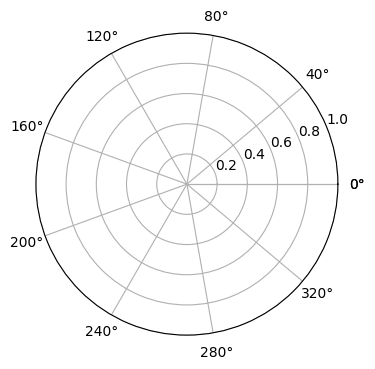

In [60]:


    
radar_plot(df25hz, "25 Hz")
    
radar_plot(dfcor, "Corrosion Agg")

plotClustersRadar(dtup25Hz, df25hz)

In [199]:
# names = df4.columns.drop(["ID", "CH", "THR","PCNTS", "COUN"])
# print(names)
# count = 0
# dropped_names_1 = []
# dropped_names_2 = []
# for c1 in names:
#     for c2 in names.drop(dropped_names_1):
#         for c3 in names.drop(dropped_names_1):
#             count+= 1
#             scatter_3d(c1, c2, c3, df)
# #             print(c1, c2, c3)
#             dropped_names_2.append(c2)
#         dropped_names_1.append(c1)


# len(df.columns.drop(["ID", "CH", "THR","PCNTS", "COUN"]))

# names = df.columns.drop(["ID", "CH", "THR"])
# count = 0
# dropped_names = []
# for c1 in names:
#     for c2 in names.drop(dropped_names):
#         count+= 1

# density_plot("P-FRQ", "FRQ-C", df4)

In [71]:


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    # for d, (y1, y2) in zip(data[1:], ranges[1:]):
    for d, (y1, y2) in zip(data, ranges):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)

    x1, x2 = ranges[0]
    d = data[0]

    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1

    sdata = [d]

    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1

        sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)

    return sdata

def set_rgrids(self, radii, labels=None, angle=None, fmt=None,
               **kwargs):
    """
    Set the radial locations and labels of the *r* grids.
    The labels will appear at radial distances *radii* at the
    given *angle* in degrees.
    *labels*, if not None, is a ``len(radii)`` list of strings of the
    labels to use at each radius.
    If *labels* is None, the built-in formatter will be used.
    Return value is a list of tuples (*line*, *label*), where
    *line* is :class:`~matplotlib.lines.Line2D` instances and the
    *label* is :class:`~matplotlib.text.Text` instances.
    kwargs are optional text properties for the labels:
    %(Text)s
    ACCEPTS: sequence of floats
    """
    # Make sure we take into account unitized data
    radii = self.convert_xunits(radii)
    radii = np.asarray(radii)
    rmin = radii.min()
    # if rmin <= 0:
    #     raise ValueError('radial grids must be strictly positive')

    self.set_yticks(radii)
    if labels is not None:
        self.set_yticklabels(labels)
    elif fmt is not None:
        self.yaxis.set_major_formatter(FormatStrFormatter(fmt))
    if angle is None:
        angle = self.get_rlabel_position()
    self.set_rlabel_position(angle)
    for t in self.yaxis.get_ticklabels():
        t.update(kwargs)
    return self.yaxis.get_gridlines(), self.yaxis.get_ticklabels()

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=5):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
            
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            # ax.set_rgrids(grid, labels=gridlabel, angle=angles[i])
            set_rgrids(ax, grid, labels=gridlabel, angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

# example data

def useRadar(df_radar):
    
    labels = df_radar.columns.drop(["ID", "CH", "THR","PCNTS", "RMS", "COUN", "SSSSSSSS.mmmuuun", "SIG-STRNGTH", "RISE", "DURATION"])
    ax = plt.subplot(111, projection="polar")

#     unitMap = {"AMP":2.5, "A-FRQ": 1, "ENER":20, "P-FRQ":1, "FRQ-C":1, "ABS-ENERGY":1, "R-FRQ":1, "ASL":1, "I-FRQ":0.25}
    
    datatuples = []
    for label in labels:
#         unitScale = unitMap[label]
        series = (df_radar[label].values)
        atuple = perform_analysis(series, label)
#         atuple = list(atuple)
#         atuple[2] *= unitScale
#         atuple[1] *= unitScale
        datatuples.append(atuple)

    means = [tup[1] for tup in datatuples]
    
    print(means)
    data = list(means)
    ranges = [(0, 5), (0, 50), (0, 500), (0, 50) ,(0, 500), (0, 2000), (0, 500), (0, 600), (0, 600), (0, 600)]     
    print(len(data))
    print(ranges)
    # plotting
    fig1 = plt.figure(figsize=(6, 6))
    radar = ComplexRadar(fig1, labels, ranges)
    radar.plot(data)
#     radar.fill(data, alpha=0.2)
    plt.show()

[4.843933279218923, 37.79041717637106, 158.6757251140404, 24.551875521613372, 92.65291703346328, 1524.3906183905156, 111.50396479118317, 534.1424276029222, 395.030982405195]
9
[(0, 5), (0, 50), (0, 500), (0, 50), (0, 500), (0, 2000), (0, 500), (0, 600), (0, 600), (0, 600)]


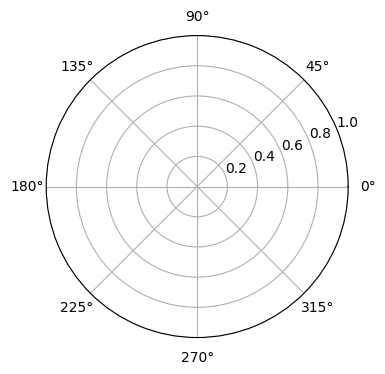

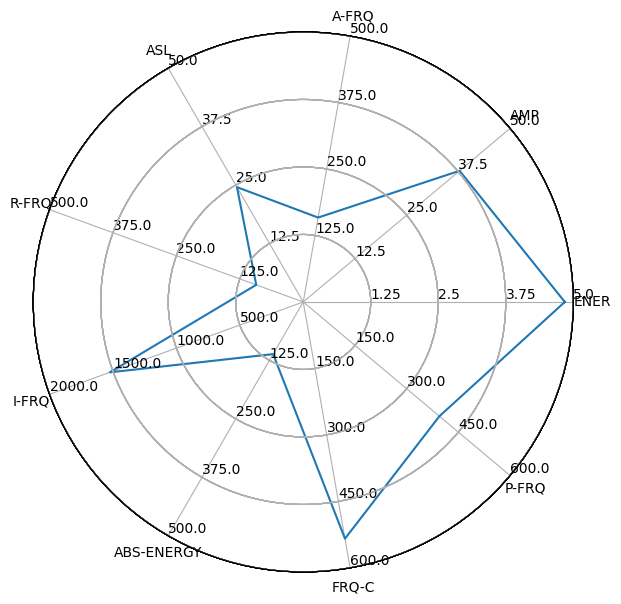

In [72]:
useRadar(df25hz)